# Gmail Smart Compose: Real-Time Assisted Writing

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import email
import re
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import*

import os
import datetime
from nltk.translate.bleu_score import sentence_bleu
import nltk.translate.bleu_score as bleu
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tensorflow.keras.layers import *
from tensorflow import keras 

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import nltk
from tensorflow.keras.backend import clear_session
from prettytable import PrettyTable

np.random.seed(42)
import pickle

pd.set_option('display.max_colwidth', None)

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [ ]:
#Read the dataset

df1 = pd.read_csv('final_dataset.csv')

In [ ]:
df1.shape

(3093422, 1)

In [ ]:
df1.head()

,body
0,"Dave, Here are the names of the west desk members by category."
1,The origination side is very sparse.
2,Phillip
3,"Paula, million is fine Phillip"
4,"Forwarded by Phillip K Allen HOU ECT on PM Enron North America Corp. From Airam Arteaga PM To Phillip K Thomas A Scott John Grant Ted Vladimir Frank cc Rita Ina Laura Kimberly Araceli Kimberly Subject Var, Reporting and Resources Meeting Please plan to attend the below Meeting Topic Var, Reporting and Resources Meeting Date Wednesday, October th Time Location EB C If you have any questions conflicts, please feel free to call me."


In [ ]:
#I am randomly picked 50000 values, because of memory issue

df= df1.sample(n = 50000)

df.shape

(50000, 1)

In [ ]:
df.head()

,body
2026669,"Your input i.e., a Self assessment, if you are a participant in this program, Manager assessment, Direct Report assessment, or Colleague Peer assessment will be combined with the input of others and used by the program participant to develop an action plan to improve his her management styles and practices."
985088,"I also am including a draft of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively."
731740,Tim's e mail address is Let me know if I can get you any specific information and I'll do my best!
2201491,"BGE defines the Scheduling Coordinator as ""An entity recognized the the PJM OI and qualified to act on behalf of the Electricity Supplier in taking such actions with PJM as are necessary in order for Electricity Supplier's obligations as defined in this Tariff to be met, including the submission of energy schedules to the PJM OI."
2621496,"This e mail and any attachments hereto are not intended to be an offer or an acceptance and do not create or evidence a binding and enforceable contract between Enron Corp. or any of its affiliates and the intended recipient or any other party, and may not be relied on by anyone as the basis of a contract by estoppel or otherwise."


In [ ]:
del df1

In [ ]:
df.dropna(inplace=True)

x = list(df['body'].apply(lambda x:len(x)))

for i in range(0,110,10):
    print("{}th- percentile of len(text) is {}".format(i,np.percentile(x, i)))
    print("="*40)

0th- percentile of len(text) is 1.0
10th- percentile of len(text) is 12.0
20th- percentile of len(text) is 27.0
30th- percentile of len(text) is 41.0
40th- percentile of len(text) is 55.0
50th- percentile of len(text) is 70.0
60th- percentile of len(text) is 88.0
70th- percentile of len(text) is 110.0
80th- percentile of len(text) is 140.0
90th- percentile of len(text) is 189.0
100th- percentile of len(text) is 2439.0


In [ ]:
df['length'] = list(df['body'].apply(lambda x:len(x)))

In [ ]:
df.head()

,body,length
2026669,"Your input i.e., a Self assessment, if you are a participant in this program, Manager assessment, Direct Report assessment, or Colleague Peer assessment will be combined with the input of others and used by the program participant to develop an action plan to improve his her management styles and practices.",308
985088,"I also am including a draft of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.",151
731740,Tim's e mail address is Let me know if I can get you any specific information and I'll do my best!,98
2201491,"BGE defines the Scheduling Coordinator as ""An entity recognized the the PJM OI and qualified to act on behalf of the Electricity Supplier in taking such actions with PJM as are necessary in order for Electricity Supplier's obligations as defined in this Tariff to be met, including the submission of energy schedules to the PJM OI.",331
2621496,"This e mail and any attachments hereto are not intended to be an offer or an acceptance and do not create or evidence a binding and enforceable contract between Enron Corp. or any of its affiliates and the intended recipient or any other party, and may not be relied on by anyone as the basis of a contract by estoppel or otherwise.",332


In [ ]:
len(df)

50000

In [ ]:
#drop all the rows, lendth more than 200 and less than 1
df = df[df['length']<=200]

df = df[df['length']>2]

len(df)

44876

In [ ]:
df.dropna(inplace=True)

x = list(df['body'].apply(lambda x:len(x)))

for i in range(0,110,10):
    print("{}th- percentile of len(text) is {}".format(i,np.percentile(x, i)))
    print("="*40)

0th- percentile of len(text) is 3.0
10th- percentile of len(text) is 13.0
20th- percentile of len(text) is 26.0
30th- percentile of len(text) is 39.0
40th- percentile of len(text) is 51.0
50th- percentile of len(text) is 64.0
60th- percentile of len(text) is 80.0
70th- percentile of len(text) is 97.0
80th- percentile of len(text) is 119.0
90th- percentile of len(text) is 148.0
100th- percentile of len(text) is 200.0


In [ ]:
df=df.drop(['length'], axis=1)

df.head()

,body
985088,"I also am including a draft of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively."
731740,Tim's e mail address is Let me know if I can get you any specific information and I'll do my best!
1544444,Change Holst and Grigsby to Million and Million.
1262374,We are presently planning our training engagements for the year.
689443,"We have provided a list of the most common functions in this file, but if you need to add functions for clarity, please do so."


In [ ]:
df.tail()

,body
2921960,Hey guys!
1404835,Jim
1531358,Sheila Can take the current spreadsheet attached and add the origination prc resuslts under the proposed cash bonus categy.
1098986,"Services include the Americas, Asia Pacific, Europe CIS and the Middle East."
2153195,Monthly and daily prices and their spreads to the Hub would be nice.


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

### Data Preparation

In [ ]:

def generate_sequence_data(emails):
    '''
    To convert our data into encoder-decoder sequences we split sentences between contiguous spans of words.    
    sentences with < 5 words are dropped
    '''
    enc_seq = []
    dec_seq = []
    body= []
    contents = emails['body']

    for text in contents:
        sent = text.split()
        
        for i in range(5,len(sent)):
            enc_seq.append(' '.join(sent[:i]))
            dec_seq.append(' '.join(sent[i:]))

    # put all in a dataframe
    data = pd.DataFrame()
    data['body_enc_seq'] = enc_seq
    data['body_dec_seq'] = dec_seq

    return data

In [ ]:
sequence_data = generate_sequence_data(df)

sequence_data.head()

,body_enc_seq,body_dec_seq
0,I also am including a,"draft of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively."
1,I also am including a draft,"of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively."
2,I also am including a draft of,"an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively."
3,I also am including a draft of an,"announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively."
4,I also am including a draft of an announcement,"to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively."


In [ ]:
# drop empty decoder-sequences
sequence_data = sequence_data[sequence_data['body_dec_seq'] != '']

In [ ]:
#Adding <sos> as Start and <eos> as End

sequence_data['body_dec_seq_inp'] = '<sos> '+sequence_data['body_dec_seq']
sequence_data['body_dec_seq_out'] = sequence_data['body_dec_seq'] + ' <eos>'

sequence_data['body_enc_seq'] = sequence_data['body_enc_seq'].apply(lambda x: str(x))
sequence_data['body_enc_seq'] = '<sos> '+sequence_data['body_enc_seq']+' <eos>'

In [ ]:
sequence_data.head()

,body_enc_seq,body_dec_seq,body_dec_seq_inp,body_dec_seq_out
0,<sos> I also am including a <eos>,"draft of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","<sos> draft of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","draft of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively. <eos>"
1,<sos> I also am including a draft <eos>,"of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","<sos> of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively. <eos>"
2,<sos> I also am including a draft of <eos>,"an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","<sos> an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively. <eos>"
3,<sos> I also am including a draft of an <eos>,"announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","<sos> announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively. <eos>"
4,<sos> I also am including a draft of an announcement <eos>,"to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","<sos> to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively. <eos>"


In [ ]:
sequence_data.shape

(389673, 4)

In [ ]:
# save data
import pickle

with open('Sequence_data.pickle', 'wb') as file:
    pickle.dump(sequence_data, file)

In [2]:
!wget --header="Host: doc-04-a8-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_i8e72o951agrsp03g5i063at61npposo_nonce=c3a5mqkteefqm" --header="Connection: keep-alive" "https://doc-04-a8-docs.googleusercontent.com/docs/securesc/9b2j1ftvtidp8f9e843gisfckled5hmm/nnf6rdqigkpasqep996o9hsprr5ssvif/1660148025000/01806599350694168671/01806599350694168671/1ZNZcR9XwJq3nMdrT62CmkJCC4OyMCCqR?e=download&ax=AI9vYm5pbOyYvdQYY_mxp6ixRyYlXjYYqqcFft9j_qWxveVR6CMj6XIEVKCXhKn8VltC_EfNb_0P59_zPyqCBSTifnCQIlqS9qBC6kyq5okPQDBwC09XeVAtUXNSnnXrRIl_HXlh8eFGHr7zhQVAC2rpKCUsNLoAB7eQhhZLkdjbDqt3nAuFlqtSt9spEIspFxplKBaKVrfr7BPtsRaE2fOaSJHOQ2lLv5DtpbUlb4t3kp_bsQ3ChPNztrX09L9kLpa_MR6gODBM-_Iapw3zp9VDdGPIp9nk845pZ6-1rCpxiAacOPbFDXjYex_e9gjJ0fYrgANm2nXgRcmjGBBShRIyAWeY0paUVD0foUVips8RtUv8olVh9GLh8JCFrnS7EuMBZxwQ9aHusUiEfiFYA0U_kl6sWZsAAELrTzqhnYGJsyNhtyHd_Ng20EVnxNSfNtCZrgpaUE11-6Zl1jUIpZSAya5e6z6z8JhGVjcBJ9TpkLMu0QDI4C0KFwh6vkHR29-3UhkltzBgtmVStDdAN_PGW4DeBBeI0PIaXqVx_kOnPZupsAd4TWcZT_GSYz-hj-LVGVhUrLcmMMLi2hiTY_8RS0Mnk6TsJMzC4iP_H4fbgw_ZEOOcUE8PQ57cnP3daohTiARhh9qzwD6HDsPATtya71y51mBAk2jYNyQO8ymuiOIEI3rHyz8U9SSYy7RHc-N4te8gvNL_l3sSB2t5&uuid=962bc8de-5d21-4f99-a5c9-c0d10d0bfb62&authuser=0&nonce=c3a5mqkteefqm&user=01806599350694168671&hash=7rt0vh4qb7mj2k382s27p7psud53cgbk" -c -O 'Sequence_data.pickle'

--2022-08-10 16:14:51--  https://doc-04-a8-docs.googleusercontent.com/docs/securesc/9b2j1ftvtidp8f9e843gisfckled5hmm/nnf6rdqigkpasqep996o9hsprr5ssvif/1660148025000/01806599350694168671/01806599350694168671/1ZNZcR9XwJq3nMdrT62CmkJCC4OyMCCqR?e=download&ax=AI9vYm5pbOyYvdQYY_mxp6ixRyYlXjYYqqcFft9j_qWxveVR6CMj6XIEVKCXhKn8VltC_EfNb_0P59_zPyqCBSTifnCQIlqS9qBC6kyq5okPQDBwC09XeVAtUXNSnnXrRIl_HXlh8eFGHr7zhQVAC2rpKCUsNLoAB7eQhhZLkdjbDqt3nAuFlqtSt9spEIspFxplKBaKVrfr7BPtsRaE2fOaSJHOQ2lLv5DtpbUlb4t3kp_bsQ3ChPNztrX09L9kLpa_MR6gODBM-_Iapw3zp9VDdGPIp9nk845pZ6-1rCpxiAacOPbFDXjYex_e9gjJ0fYrgANm2nXgRcmjGBBShRIyAWeY0paUVD0foUVips8RtUv8olVh9GLh8JCFrnS7EuMBZxwQ9aHusUiEfiFYA0U_kl6sWZsAAELrTzqhnYGJsyNhtyHd_Ng20EVnxNSfNtCZrgpaUE11-6Zl1jUIpZSAya5e6z6z8JhGVjcBJ9TpkLMu0QDI4C0KFwh6vkHR29-3UhkltzBgtmVStDdAN_PGW4DeBBeI0PIaXqVx_kOnPZupsAd4TWcZT_GSYz-hj-LVGVhUrLcmMMLi2hiTY_8RS0Mnk6TsJMzC4iP_H4fbgw_ZEOOcUE8PQ57cnP3daohTiARhh9qzwD6HDsPATtya71y51mBAk2jYNyQO8ymuiOIEI3rHyz8U9SSYy7RHc-N4te8gvNL_l3sSB2t5&uuid=962bc8de-5d21-4f

In [3]:
!wget --header="Host: doc-10-a8-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_i8e72o951agrsp03g5i063at61npposo=01806599350694168671|1660148025000|952h82i1o7v5f07gp06bqbse7bi5db0t" --header="Connection: keep-alive" "https://doc-10-a8-docs.googleusercontent.com/docs/securesc/9b2j1ftvtidp8f9e843gisfckled5hmm/vfmkelat40acsv7csncsgkncpu5616k6/1660148100000/01806599350694168671/01806599350694168671/1Ix-I-jJDPL0WXJLHDAnmaNdElXwLrdkO?e=download&ax=AI9vYm42EuivGXOIc_dX3LkH6gHA5CUsxa-SZYwVzlqO7vDRh5busc0gUQVIFGBPMCxZzpEjJBcgiJCoiFHpm7oBSa6weoFadJX9kJTovKHNTGbffFGgRWAiR_2qVahjIV42jtnzVt1fAl43lOKlZYG8HdY7KCGmK_96HKVU3YcQGapXN4jFMS-k98Va6L8ZsoVT0j5kIK7_35zLBkDB4scjA-AY6M7VMWqsESZE9oKfho3nuCdsQtpNlr4C2v6EjQxxTR7ypFw-rXUKaSMHX50qvYY3ZITnycQ5FSE_uOhNWyv2HOOOafGJ2rImpZ20oMKPnLymqGHMYQoP9S4YIwYHhHo4Jk1_sxu_b2YqBrz_BYtb49BC_-KWWnTXRwJquQ7LP8ckxyCXRG2KEybCruU6jxR5hHQvtHOfIbAs2nbXWoo6BScPzAgF3z_WbvdyQzSFLsSFtRByohNaNVAyHoWUa6VwYG3_fdZ1oF3ynPt7vuDC2rlZWgP0uwBBrFBMHGY6PvwofT9zCZC2xCFBDAKs8AxDZPAcUMbxnOpqFoFt-hBezyn583k3puFsZmVdm1693RT7z63imWjpoFh5wT6DSljbit0V4TaLfqf_tTyvycDBwVttOVdItLejaBeCemdrfT1VKU0RZmqRXTmmgvX4OOhuaisjX_BqE3q5zCI_lqHdvByG9DXz5ykPH2JcgFay-AQR70ZKswJnYIhK&uuid=ceaad859-5315-4db4-964b-3dd9129ca190&authuser=0" -c -O 'glove.6B.300d.txt'

--2022-08-10 16:15:20--  https://doc-10-a8-docs.googleusercontent.com/docs/securesc/9b2j1ftvtidp8f9e843gisfckled5hmm/vfmkelat40acsv7csncsgkncpu5616k6/1660148100000/01806599350694168671/01806599350694168671/1Ix-I-jJDPL0WXJLHDAnmaNdElXwLrdkO?e=download&ax=AI9vYm42EuivGXOIc_dX3LkH6gHA5CUsxa-SZYwVzlqO7vDRh5busc0gUQVIFGBPMCxZzpEjJBcgiJCoiFHpm7oBSa6weoFadJX9kJTovKHNTGbffFGgRWAiR_2qVahjIV42jtnzVt1fAl43lOKlZYG8HdY7KCGmK_96HKVU3YcQGapXN4jFMS-k98Va6L8ZsoVT0j5kIK7_35zLBkDB4scjA-AY6M7VMWqsESZE9oKfho3nuCdsQtpNlr4C2v6EjQxxTR7ypFw-rXUKaSMHX50qvYY3ZITnycQ5FSE_uOhNWyv2HOOOafGJ2rImpZ20oMKPnLymqGHMYQoP9S4YIwYHhHo4Jk1_sxu_b2YqBrz_BYtb49BC_-KWWnTXRwJquQ7LP8ckxyCXRG2KEybCruU6jxR5hHQvtHOfIbAs2nbXWoo6BScPzAgF3z_WbvdyQzSFLsSFtRByohNaNVAyHoWUa6VwYG3_fdZ1oF3ynPt7vuDC2rlZWgP0uwBBrFBMHGY6PvwofT9zCZC2xCFBDAKs8AxDZPAcUMbxnOpqFoFt-hBezyn583k3puFsZmVdm1693RT7z63imWjpoFh5wT6DSljbit0V4TaLfqf_tTyvycDBwVttOVdItLejaBeCemdrfT1VKU0RZmqRXTmmgvX4OOhuaisjX_BqE3q5zCI_lqHdvByG9DXz5ykPH2JcgFay-AQR70ZKswJnYIhK&uuid=ceaad859-5315-4d

In [4]:
# load data
import pickle

with open('Sequence_data.pickle', 'rb') as file:
    sequence_data = pickle.load(file)

In [5]:
sequence_data.shape

(389673, 4)

In [6]:
sequence_data.head()

,body_enc_seq,body_dec_seq,body_dec_seq_inp,body_dec_seq_out
0,<sos> I also am including a <eos>,"draft of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","<sos> draft of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","draft of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively. <eos>"
1,<sos> I also am including a draft <eos>,"of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","<sos> of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","of an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively. <eos>"
2,<sos> I also am including a draft of <eos>,"an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","<sos> an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","an announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively. <eos>"
3,<sos> I also am including a draft of an <eos>,"announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","<sos> announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","announcement to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively. <eos>"
4,<sos> I also am including a draft of an announcement <eos>,"to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","<sos> to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively.","to Omaha and Houston employees regarding the meetings you have scheduled on the th and th, respectively. <eos>"


In [7]:
#train,cv,test split

train, test = train_test_split(sequence_data, test_size = 0.2, random_state = 0)

train, val = train_test_split(train, test_size = 0.25, random_state = 0)

In [8]:
#Tokenization is breaking the raw text into small chunks.

tokenizer_enc = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')

tokenizer_enc.fit_on_texts(train['body_enc_seq'].values)


tokenizer_dec = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')

tokenizer_dec.fit_on_texts(train['body_dec_seq_inp'].values + train['body_dec_seq_out'].values)

In [9]:
#gathering some other data

max_enc = 0
enc_vocab = set()
for sent in sequence_data['body_dec_seq_inp'].values+sequence_data['body_dec_seq_out'].values:
    length = len(sent.split())
    if length > max_enc:
        max_enc = length
    for word in sent.split():
        enc_vocab.add(word)
vocab_size_enc = len(enc_vocab)

max_dec = 0
dec_vocab = set()
for sent in sequence_data['body_enc_seq']:
    length = len(sent.split())
    if length > max_dec:
        max_dec = length
    for word in sent.split():
        dec_vocab.add(word)
vocab_size_dec = len(dec_vocab)

In [10]:
#Creating data for encoder decoder model

class Dataset:
    def __init__(self, data, tokenizer_enc, tokenizer_dec, max_enc, max_dec):
        self.encoder_inps = data['body_enc_seq'].values
        self.decoder_inps = data['body_dec_seq_inp'].values
        self.decoder_outs = data['body_dec_seq_out'].values
        self.tokenizer_dec = tokenizer_dec
        self.tokenizer_enc = tokenizer_enc
        self.max_enc = max_enc
        self.max_dec = max_dec

    def __getitem__(self, i):
        self.encoder_seq = self.tokenizer_enc.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values
        self.decoder_inp_seq = self.tokenizer_dec.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tokenizer_dec.texts_to_sequences([self.decoder_outs[i]])

        self.encoder_seq = pad_sequences(self.encoder_seq, maxlen=self.max_enc, dtype='int32', padding='post')
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen=self.max_dec, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=self.max_dec, dtype='int32', padding='post')
        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)

In [11]:
#Creating batch for encoder decoder model

class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps))

    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]

        return tuple([[tf.convert_to_tensor(batch[0]), tf.convert_to_tensor(batch[1])], tf.convert_to_tensor(batch[2])])

    
    def __len__(self):  
        # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        
        self.indexes = np.random.permutation(self.indexes)

In [12]:
#word embedding is a learned representation for text where words that have the same meaning have a similar representation.

embeddings_index = dict()
f = open('glove.6B.300d.txt', encoding = 'utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))


Loaded 400000 word vectors.


In [13]:
embedding_matrix = np.zeros((vocab_size_dec, 300))
for word, i in tokenizer_dec.word_index.items():
    embedding_vector = embeddings_index.get(ord)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [14]:
#saved all these data for further uses

with open('tokenizer_enc.pickle', 'wb') as file:
    pickle.dump(tokenizer_enc, file)
    
with open('tokenizer_dec.pickle', 'wb') as file:
    pickle.dump(tokenizer_dec, file)
    
    
with open('vocab_size_enc.pickle', 'wb') as file:
    pickle.dump(vocab_size_enc, file)
    
with open('vocab_size_dec.pickle', 'wb') as file:
    pickle.dump(vocab_size_dec, file)
    
    

# Model

#### We have divided the  LSTM Model into two parts

#### 1. LSTM Without Attention layer

#### 2. LSTM With Attention layer

## 1. LSTM Without Attention layer

In [15]:
batch_size=32
lstm_size=128
max_dec = 50
max_enc = 29
embedding_dim = 100
dense_units = 256
latent_dim=192


In [16]:
state=[tf.zeros((batch_size, lstm_size)), tf.zeros((batch_size, lstm_size))]

# LSTM Encoder
enc_inp = keras.layers.Input(shape=(max_enc,))
encoder_embedding = keras.layers.Embedding(input_dim=vocab_size_enc, output_dim=embedding_dim,input_length = max_enc)
encoder_lstm = keras.layers.LSTM(lstm_size, return_sequences = True, return_state = True)

output_state, enc_h, enc_c = encoder_lstm(encoder_embedding(enc_inp),initial_state=state)

# LSTM Decoder
dec_inp = keras.layers.Input(shape=(None,))
decoder_embedding = keras.layers.Embedding(input_dim=vocab_size_dec, output_dim=embedding_dim,input_length = max_dec)
decoder_lstm = keras.layers.LSTM(units=lstm_size , return_sequences = True, return_state = True)

output, _ , _ = decoder_lstm(decoder_embedding(dec_inp), initial_state=[enc_h,enc_c])


decoder_dense = keras.layers.Dense(vocab_size_dec, activation="softmax")
decoder_out = decoder_dense(output)

# Define the model that uses the Encoder and the Decoder
model_lstm = keras.models.Model([enc_inp, dec_inp], decoder_out)
model_lstm.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 29)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 29, 100)      27212400    ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, None, 100)    3673000     ['input_2[0][0]']                
                                                                                              

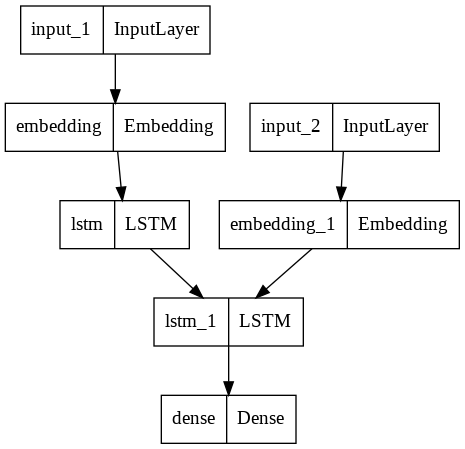

In [17]:
tf.keras.utils.plot_model(model_lstm,to_file='model_lstm.png')

In [18]:
!ls -ltr

total 1114860
drwxr-xr-x 1 root root       4096 Aug  3 20:21 sample_data
-rw-r--r-- 1 root root  101363371 Aug 10 16:14 Sequence_data.pickle
-rw-r--r-- 1 root root 1037962819 Aug 10 16:15 glove.6B.300d.txt
-rw-r--r-- 1 root root    1069446 Aug 10 16:16 tokenizer_enc.pickle
-rw-r--r-- 1 root root    1179129 Aug 10 16:16 tokenizer_dec.pickle
-rw-r--r-- 1 root root          8 Aug 10 16:16 vocab_size_enc.pickle
-rw-r--r-- 1 root root          6 Aug 10 16:16 vocab_size_dec.pickle
-rw-r--r-- 1 root root      18712 Aug 10 16:17 model_lstm.png


In [19]:
from google.colab import files
files.download('model_lstm.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### We are using the same LSTM Encoder Decoder model in class shape for rest of the project

### 1.1 LSTM with Adam Optimizer

#### Encoder

In [ ]:
class Encoder(tf.keras.Model):
    

    '''
    Encoder model -- That takes a input sequence and returns encoder-outputs,encoder_final_state_h,encoder_final_state_c
    '''
    

    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):
        

        #Initialize Embedding layer
        #Intialize Encoder LSTM layer
        
        super().__init__()
        self.lstm_size = lstm_size
        #Initialize Embedding layer
        self.enc_embed = Embedding(input_dim = inp_vocab_size, output_dim = embedding_size, input_length= input_length)
        #Intialize Encoder LSTM layer
        self.enc_lstm = LSTM(lstm_size, return_sequences = True, return_state = True)



    def call(self,input_sequence,states):
        
        
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- encoder_output, last time step's hidden and cell state
        '''

        embedding = self.enc_embed(input_sequence)
        output_state, enc_h, enc_c = self.enc_lstm(embedding, initial_state = states)
        
        return output_state, enc_h, enc_c
        

    
    def initialize_states(self,batch_size):
        
        '''
        Given a batch size it will return intial hidden state and intial cell state.
        If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
        '''
        
        return [tf.zeros((batch_size, self.lstm_size)), tf.zeros((batch_size, self.lstm_size))]
        
        
    

#### Decoder

In [ ]:
class Decoder(tf.keras.Model):
    '''
    Decoder model -- That takes a input sequence and returns output sequence
    '''
    def __init__(self,out_vocab_size,embedding_size,lstm_size,input_length):
        #Initialize Embedding layer
        #Intialize Decoder LSTM layer
        
        super().__init__()
        #Initialize Embedding layer
        self.dec_embed = Embedding(input_dim = out_vocab_size, output_dim = embedding_size, input_length = input_length)
        #Intialize Decoder LSTM layer
        self.dec_lstm = LSTM(lstm_size, return_sequences = True, return_state = True)
    
    def call(self,input_sequence, initial_states):
        
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to decoder_lstm
        
          returns -- decoder_output,decoder_final_state_h,decoder_final_state_c
        '''

        embedding = self.dec_embed(input_sequence)
        
        output_state, dec_h, dec_c = self.dec_lstm(embedding, initial_state = initial_states)
        
        return output_state, dec_h, dec_c

#### Encoder_decoder

In [ ]:
class Encoder_decoder(tf.keras.Model): 
    
    def __init__(self,*params):
    
        #Create encoder object
        #Create decoder object
        #Intialize Dense layer(out_vocab_size) with activation='softmax'
    
        super().__init__()
        #Create encoder object
        self.encoder = Encoder(inp_vocab_size = params[0], embedding_size = params[2], lstm_size = params[3], input_length = params[4])
        #Create decoder object
        self.decoder = Decoder(out_vocab_size = params[1], embedding_size = params[2], lstm_size = params[3], input_length = params[5])
        #Intialize Dense layer(out_vocab_size) with activation='softmax'
        self.dense = Dense(params[1], activation='softmax')
    
    @tf.function
    def call(self, params, training = True):
        
        '''
        1. Pass the input sequence to Encoder layer -- Return encoder_output,encoder_final_state_h,encoder_final_state_c
        2. Pass the target sequence to Decoder layer with intial states as encoder_final_state_h,encoder_final_state_C
        3. Pass the decoder_outputs into Dense layer 
        
        Return decoder_outputs
        '''
        

        enc_inp, dec_inp = params[0], params[1]
        
        initial_state = self.encoder.initialize_states(batch_size)
        
        output_state, enc_h, enc_c = self.encoder(enc_inp, initial_state)
        
        output, _, _ = self.decoder(dec_inp ,[enc_h, enc_c])
        
        return self.dense(output)

In [ ]:
train_dataset = Dataset(train, tokenizer_enc, tokenizer_dec, max_enc, max_dec)
test_dataset  = Dataset(test, tokenizer_enc, tokenizer_dec, max_enc, max_dec)
val_dataset  = Dataset(val, tokenizer_enc, tokenizer_dec, max_enc, max_dec)

train_dataloader = Dataloder(train_dataset, batch_size=batch_size)
test_dataloader = Dataloder(test_dataset, batch_size=batch_size)
val_dataloader = Dataloder(val_dataset, batch_size = batch_size)

In [ ]:
model = Encoder_decoder(vocab_size_enc, 
                        vocab_size_dec, 
                        embedding_dim, 
                        lstm_size, 
                        max_enc, 
                        max_dec, 
                        dense_units)

In [ ]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy')

In [ ]:
import datetime

log_dir="logs/fit/LSTM/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

#A callback is a function passed as an argument to another function. This technique allows a function to call another function.
callbacks = [ModelCheckpoint("lstm_adam", save_best_only= True, verbose = 1),
             TensorBoard(log_dir = log_dir, histogram_freq=1, write_graph=True),
             EarlyStopping(monitor='val_loss',patience = 5, verbose = 1),
             ReduceLROnPlateau(monitor='val_loss',patience = 2, verbose = 1)]


In [ ]:
#Model training
model.fit(x = train_dataloader, 
          steps_per_epoch = train_dataloader.__len__(),
          validation_data = val_dataloader,
          validation_steps = val_dataloader.__len__(),
          epochs = 40,
          verbose = 1,
          callbacks = callbacks)

Epoch 1/40
7306/7306 [==============================] - 2602s 356ms/step - loss: 1.4761 - val_loss: 0.9652

Epoch 00001: val_loss improved from inf to 0.96517, saving model to lstm_addm
Epoch 2/40
7306/7306 [==============================] - 2576s 353ms/step - loss: 0.9076 - val_loss: 0.7918

Epoch 00002: val_loss improved from 0.96517 to 0.79184, saving model to lstm_addm
Epoch 3/40
7306/7306 [==============================] - 2736s 375ms/step - loss: 0.7399 - val_loss: 0.6864

Epoch 00003: val_loss improved from 0.79184 to 0.68640, saving model to lstm_addm
Epoch 4/40
7306/7306 [==============================] - 2589s 354ms/step - loss: 0.6328 - val_loss: 0.6166

Epoch 00004: val_loss improved from 0.68640 to 0.61656, saving model to lstm_addm
Epoch 5/40
7306/7306 [==============================] - 2586s 354ms/step - loss: 0.5600 - val_loss: 0.5658

Epoch 00005: val_loss improved from 0.61656 to 0.56584, saving model to lstm_addm
Epoch 6/40
7306/7306 [==============================] 

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit/LSTM/20220726-214001/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 12268), started 10 days, 21:56:02 ago. (Use '!kill 12268' to kill it.)

In [ ]:
test_steps = test_dataloader.__len__()
model.evaluate(test_dataloader,steps=test_steps)

2435/2435 [==============================] - 165s 68ms/step - loss: 0.3543


0.35427072644233704

### Prediction

In [ ]:
class pred_Encoder_decoder(tf.keras.Model): 
    def __init__(self,*params):
        super().__init__()
        #Create encoder object
        self.encoder = Encoder(inp_vocab_size = params[0], embedding_size = params[2], lstm_size = params[3], input_length = params[4])
        #Create decoder object
        self.decoder = Decoder(out_vocab_size = params[1], embedding_size = params[2], lstm_size = params[3], input_length = params[5])
        #Intialize Dense layer(out_vocab_size) with activation='softmax'
        self.dense = Dense(params[1], activation='softmax')
    
    def call(self, params, training = True):
        '''
        1. Pass the input sequence to Encoder layer -- Return encoder_output,encoder_final_state_h,encoder_final_state_c
        2. Pass the target sequence to Decoder layer with intial states as encoder_final_state_h,encoder_final_state_C
        3. Pass the decoder_outputs into Dense layer 
        
        Return decoder_outputs
        '''
        enc_inp = params[0]
        initial_state = self.encoder.initialize_states(1)
        
        output_state, enc_h, enc_c = self.encoder(enc_inp, initial_state)
        pred = tf.expand_dims([tokenizer_dec.word_index['<sos>']], 0)
        
        dec_h = enc_h
        dec_c = enc_c
        
        all_pred = []
        
        for t in range(max_dec):  
            pred, dec_h,dec_c = self.decoder(pred, [dec_h, dec_c])
            pred = self.dense(pred)
            pred = tf.argmax(pred, axis = -1)
            all_pred.append(pred)
        
        return all_pred

In [ ]:
pred_model = pred_Encoder_decoder(vocab_size_enc, 
                                  vocab_size_dec, 
                                  embedding_dim, 
                                  lstm_size, 
                                  max_enc, 
                                  max_dec, 
                                  dense_units)



In [ ]:
pred_model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy')

In [ ]:
#Load the previously trained model
pred_model.load_weights('lstm_adam')

In [ ]:
def predict(input_sequence):
    '''
    1. Given the input sentence, convert the sentence into integers using the tokenizer used earlier
    2. Pass the input_sequence to the encoder. we get encoder_outputs, last time step hidden and cell state
    3. Initialize index of <start> as input to decoder. and encoder final states as input_states to the decoder
    4. till we reach max_length of decoder or till the model predicted word <end>:
         predicted_out,state_h,state_c=model.layers[1](dec_input,states)
         pass the predicted_out to the dense layer
         update the states=[state_h,state_c]
         And get the index of the word with the maximum probability of the dense layer output, using the tokenizer(word index) get the word and then store it in a string.
         Update the input_to_decoder with current predictions
    5. Return the predicted sentence
    '''
    seq = input_sequence
    seq = '<sos> '+seq+' <eos>'
    seq = tokenizer_enc.texts_to_sequences([seq])
    
    seq = pad_sequences(seq, maxlen=max_dec, padding='post', dtype = np.int32)
    pred = pred_model.predict(tf.expand_dims(seq, 0))
    output = []
    for i in pred:
        word = tokenizer_dec.index_word[i[0][0]]
        if word == '<eos>':
            break
        output.append(word)
    return ' '.join(output)

In [ ]:
sentence = 'I also'
print('input : ', sentence)

result = predict(sentence)
print('predicted output : ',result)


input :  I also
predicted output :  need to have to be in the attached credit worksheet with a master firm purchase sale inc under may


In [ ]:
sentence = 'I also am including a draft of an announcement'
print('input : ', sentence)

result = predict(sentence)
print('predicted output : ',result)


input :  I also am including a draft of an announcement
predicted output :  today


### Bleu score

In [ ]:
def BLEUScore():
    BLEUscore_list = []
    for x in  test['body_enc_seq'].sample(10000):
        reference = x.split()
        hypothesis = predict(x)
        BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis.split())
        BLEUscore_list.append(BLEUscore)
        
    return sum(BLEUscore_list)/len(BLEUscore_list)

In [ ]:
bleuscore_lstm =BLEUScore()

print(bleuscore_lstm)

0.4841624183167232


### 1.2. LSTM with RMSProp Optimizer

In [ ]:
model2 = Encoder_decoder(vocab_size_enc, 
                        vocab_size_dec, 
                        embedding_dim, 
                        lstm_size, 
                        max_enc, 
                        max_dec, 
                        dense_units)

In [ ]:
model2.compile(optimizer = 'RMSprop', loss = 'sparse_categorical_crossentropy')

In [ ]:
import datetime

log_dir="logs/fit/LSTM2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

#A callback is a function passed as an argument to another function. This technique allows a function to call another function.
callbacks = [ModelCheckpoint("lstm_RMSprop", save_best_only= True, verbose = 1),
             TensorBoard(log_dir = log_dir, histogram_freq=1, write_graph=True),
             EarlyStopping(monitor='val_loss',patience = 5, verbose = 1),
             ReduceLROnPlateau(monitor='val_loss',patience = 2, verbose = 1)]


In [ ]:
#Model training
model2.fit(x = train_dataloader, 
          steps_per_epoch = train_dataloader.__len__(),
          validation_data = val_dataloader,
          validation_steps = val_dataloader.__len__(),
          epochs = 40,
          verbose = 1,
          callbacks = callbacks)

Epoch 1/40
7306/7306 [==============================] - 2516s 344ms/step - loss: 1.3382 - val_loss: 1.0411

Epoch 00001: val_loss improved from inf to 1.04105, saving model to lstm_RMSprop
Epoch 2/40
7306/7306 [==============================] - 2375s 325ms/step - loss: 1.0179 - val_loss: 0.9891

Epoch 00002: val_loss improved from 1.04105 to 0.98906, saving model to lstm_RMSprop
Epoch 3/40
7306/7306 [==============================] - 2368s 324ms/step - loss: 0.9757 - val_loss: 0.9637

Epoch 00003: val_loss improved from 0.98906 to 0.96368, saving model to lstm_RMSprop
Epoch 4/40
7306/7306 [==============================] - 2359s 323ms/step - loss: 0.9428 - val_loss: 0.9341

Epoch 00004: val_loss improved from 0.96368 to 0.93409, saving model to lstm_RMSprop
Epoch 5/40
7306/7306 [==============================] - 2340s 320ms/step - loss: 0.9062 - val_loss: 0.9010

Epoch 00005: val_loss improved from 0.93409 to 0.90101, saving model to lstm_RMSprop
Epoch 6/40
7306/7306 [=================

In [ ]:
%reload_ext tensorboard

%tensorboard --logdir logs/fit/LSTM2/20220730-205557/

Reusing TensorBoard on port 6006 (pid 27900), started 0:01:00 ago. (Use '!kill 27900' to kill it.)

In [ ]:
test_steps = test_dataloader.__len__()
model2.evaluate(test_dataloader,steps=test_steps)

2435/2435 [==============================] - 232s 95ms/step - loss: 0.6798


0.6797993183135986

### Prediction

In [ ]:
pred_model2 = pred_Encoder_decoder(vocab_size_enc, 
                                  vocab_size_dec, 
                                  embedding_dim, 
                                  lstm_size, 
                                  max_enc, 
                                  max_dec, 
                                  dense_units)



In [ ]:
pred_model2.compile(optimizer = 'RMSprop', loss = 'sparse_categorical_crossentropy')

In [ ]:
#Load the previously trained model
pred_model2.load_weights('lstm_RMSprop')

In [ ]:
def predict(input_sequence):
        
    '''
    1. Given the input sentence, convert the sentence into integers using the tokenizer used earlier
    2. Pass the input_sequence to the encoder. we get encoder_outputs, last time step hidden and cell state
    3. Initialize index of <start> as input to decoder. and encoder final states as input_states to the decoder
    4. till we reach max_length of decoder or till the model predicted word <end>:
         predicted_out,state_h,state_c=model.layers[1](dec_input,states)
         pass the predicted_out to the dense layer
         update the states=[state_h,state_c]
         And get the index of the word with the maximum probability of the dense layer output, using the tokenizer(word index) get the word and then store it in a string.
         Update the input_to_decoder with current predictions
    5. Return the predicted sentence
    '''
    
    
    seq = input_sequence
    seq = '<sos> '+seq+' <eos>'
    seq = tokenizer_enc.texts_to_sequences([seq])
    
    seq = pad_sequences(seq, maxlen=max_dec, padding='post', dtype = np.int32)
    pred = pred_model2.predict(tf.expand_dims(seq, 0))
    output = []
    for i in pred:
        word = tokenizer_dec.index_word[i[0][0]]
        if word == '<eos>':
            break
        output.append(word)
    return ' '.join(output)

In [ ]:
sentence = 'I also'
print('input : ', sentence)

result = predict(sentence)
print('predicted output : ',result)


input :  I also
predicted output :  have sure that you want to go to the following the enron has our power trading isda and a same form for that you can be the right hand to get to credit help


In [ ]:
sentence = 'I also am including a draft of an announcement'
print('input : ', sentence)

result = predict(sentence)
print('predicted output : ',result)


input :  I also am including a draft of an announcement
predicted output :  of the last month st cc click on the following documents click here for


### Bleu score

In [ ]:
def BLEUScore():
    BLEUscore_list = []
    for x in  test['body_enc_seq'].sample(10000):
        reference = x.split()
        hypothesis = predict(x)
        BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis.split())
        BLEUscore_list.append(BLEUscore)
        
    return sum(BLEUscore_list)/len(BLEUscore_list)

In [ ]:
bleuscore_lstm2 =BLEUScore()

print(bleuscore_lstm2)

0.3962702464798132


# 2. LSTM with Attention layer

In [20]:
batch_size=32
lstm_size=128
max_dec = 50
max_enc = 29
embedding_dim = 100
dense_units = 256
latent_dim=192


In [21]:

state=[tf.zeros((batch_size, lstm_size)), tf.zeros((batch_size, lstm_size))]

# LSTM Encoder
enc_inp = keras.layers.Input(shape=(max_enc,))
encoder_embedding = keras.layers.Embedding(input_dim=vocab_size_enc, output_dim=embedding_dim,input_length = max_enc)
encoder_lstm = keras.layers.LSTM(lstm_size, return_sequences = True, return_state = True)

output_state, enc_h, enc_c = encoder_lstm(encoder_embedding(enc_inp),initial_state=state)

# LSTM Decoder
dec_inp = keras.layers.Input(shape=(None,))
decoder_embedding = keras.layers.Embedding(input_dim=vocab_size_dec, output_dim=embedding_dim,input_length = max_dec)
decoder_lstm = keras.layers.LSTM(units=lstm_size , return_sequences = True, return_state = True)

output, _ , _ = decoder_lstm(decoder_embedding(dec_inp), initial_state=[enc_h,enc_c])


################ define attention  #####################
attention = dot([output, output_state], axes=[2, 2],name = 'Dot_1')
attention = Activation('softmax', name='attention')(attention)
context = dot([attention, output_state], axes=[2,1], name='Dot_2')
decoder_combined_context = concatenate([context, output],name='Concatenate')
output = Dense(vocab_size_dec, activation="softmax")(decoder_combined_context)
final_output = (output)

# Define the model that uses the Encoder and the Decoder
model_lstm = keras.models.Model([enc_inp, dec_inp], final_output)
model_lstm.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 29)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 29, 100)      27212400    ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, None, 100)    3673000     ['input_4[0][0]']                
                                                                                            

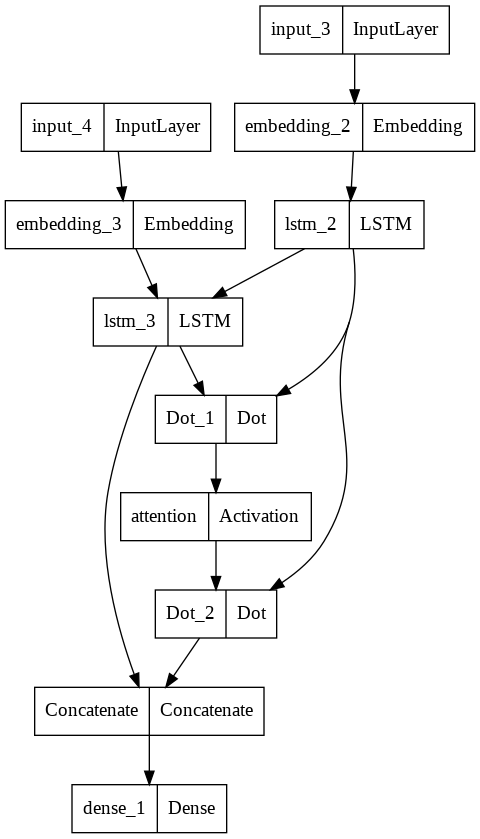

In [22]:
tf.keras.utils.plot_model(model_lstm,to_file='model_lstm_attention.png')

In [23]:
!ls -ltr

total 1114900
drwxr-xr-x 1 root root       4096 Aug  3 20:21 sample_data
-rw-r--r-- 1 root root  101363371 Aug 10 16:14 Sequence_data.pickle
-rw-r--r-- 1 root root 1037962819 Aug 10 16:15 glove.6B.300d.txt
-rw-r--r-- 1 root root    1069446 Aug 10 16:16 tokenizer_enc.pickle
-rw-r--r-- 1 root root    1179129 Aug 10 16:16 tokenizer_dec.pickle
-rw-r--r-- 1 root root          8 Aug 10 16:16 vocab_size_enc.pickle
-rw-r--r-- 1 root root          6 Aug 10 16:16 vocab_size_dec.pickle
-rw-r--r-- 1 root root      18712 Aug 10 16:17 model_lstm.png
-rw-r--r-- 1 root root      39658 Aug 10 16:17 model_lstm_attention.png


In [24]:
from google.colab import files
files.download('model_lstm_attention.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Encoder

In [ ]:

class Encoder(tf.keras.layers.Layer):
    '''
    Encoder model -- That takes a input sequence and returns encoder-outputs,encoder_final_state_h,encoder_final_state_c
    '''

    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):
        super(Encoder, self).__init__()
        self.lstm_size = lstm_size
        #Initialize Embedding layer
        self.enc_embed = Embedding(input_dim = inp_vocab_size, output_dim = embedding_size)
        #Intialize Encoder LSTM layer
        self.enc_lstm = LSTM(lstm_size, return_sequences = True, return_state = True)
        
    def call(self,input_sequence,states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- encoder_output, last time step's hidden and cell state
        '''
        embedding = self.enc_embed(input_sequence)
        output_state, enc_h, enc_c = self.enc_lstm(embedding, initial_state = states)
        return output_state, enc_h, enc_c
    
    def initialize_states(self,batch_size):
      '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
      '''
      return [tf.zeros((batch_size, self.lstm_size)), tf.zeros((batch_size, self.lstm_size))]


### Attention Model

In [ ]:
class Attention(tf.keras.layers.Layer):

    def __init__(self,scoring_function, att_units):
        
        # Please go through the reference notebook and research paper to complete the scoring functions
        
        super(Attention, self).__init__()
        self.scoring_function = scoring_function
        
        # Intialize variables needed for Dot score function here
        if scoring_function == 'dot':
            self.dot = Dot(axes = (1, 2))
            pass
        
        # Intialize variables needed for General score function here
        if scoring_function == 'general':
            self.W = Dense(att_units)
            self.dot = Dot(axes = (1, 2))
            pass
        
        # Intialize variables needed for Concat score function here
        if scoring_function == 'concat':
            self.W1 = Dense(att_units)
            self.W2 = Dense(att_units)
            self.V = Dense(1)
            pass
        
    def call(self,decoder_hidden_state,encoder_output):
        
        '''
        Attention mechanism takes two inputs current step -- decoder_hidden_state and all the encoder_outputs.
        Based on the scoring function we will find the score or similarity between decoder_hidden_state and encoder_output.
        Multiply the score function with your encoder_outputs to get the context vector.
        Function returns context vector and attention weights(softmax - scores)
        '''
    
        decoder_hidden_state = tf.expand_dims(decoder_hidden_state, 1)
        
        if self.scoring_function == 'dot':
            # Implement Dot score function here
            score = tf.transpose(self.dot([tf.transpose(decoder_hidden_state, (0, 2, 1)), encoder_output]), (0, 2,1))
            pass
            
        elif self.scoring_function == 'general':
            # Implement General score function here
            mul = self.W(encoder_output)
            score = tf.transpose(self.dot([tf.transpose(decoder_hidden_state, (0, 2, 1)), mul]), (0, 2,1))
            pass
            
        elif self.scoring_function == 'concat':
            # Implement General score function here
            inter = self.W1(decoder_hidden_state) + self.W2(encoder_output)
            tan = tf.nn.tanh(inter)
            score = self.V(tan)
            pass
        
        attention_weights = tf.nn.softmax(score, axis =1)
        context_vector = attention_weights * encoder_output
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector, attention_weights

### OneStepDecoder

In [ ]:
class One_Step_Decoder(tf.keras.Model):
    
    def __init__(self,tar_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
        
        # Initialize decoder embedding layer, LSTM and any other objects needed
        super().__init__()
        self.tar_vocab_size = tar_vocab_size
        self.embedding_dim = embedding_dim
        self.input_dim = input_length
        self.lstm_units = dec_units
        self.score_fun = score_fun
        self.att_units = att_units
        self.context_vector = 0
        self.attention_weights = 0
        self.dec_output = 0
        self.decoder_state_h = 0
        self.decoder_state_c = 0

        self.Embedding_layer = Embedding(input_dim= self.tar_vocab_size, output_dim= self.embedding_dim,input_length= self.input_dim,
                                      mask_zero = True, name = "decoder_embedding_layer")
        self.LSTM_layer = LSTM(units = self.lstm_units, return_sequences= True,return_state= True, name = "decoder_LSTM_layer")

        self.Attention_layer = Attention(self.score_fun, self.att_units)

        self.Dense_layer = Dense(units = self.tar_vocab_size)
        
    def call(self,input_to_decoder, encoder_output, state_h,state_c):
        '''
        One step decoder mechanisim step by step:
      A. Pass the input_to_decoder to the embedding layer and then get the output(batch_size,1,embedding_dim)
      B. Using the encoder_output and decoder hidden state, compute the context vector.
      C. Concat the context vector with the step A output
      D. Pass the Step-C output to LSTM/GRU and get the decoder output and states(hidden and cell state)
      E. Pass the decoder output to dense layer(vocab size) and store the result into output.
      F. Return the states from step D, output from Step E, attention weights from Step -B
        '''
        embedded_output = self.Embedding_layer(input_to_decoder)
        
        self.context_vector,self.attention_weights = self.Attention_layer(state_h,encoder_output)
        self.context_vector = tf.expand_dims(self.context_vector, axis = 1)
        
        concanated_decoder_input = tf.concat([self.context_vector,embedded_output], axis = -1)
        
        self.dec_output, self.decoder_state_h, self.decoder_state_c = self.LSTM_layer(concanated_decoder_input,
                                                                                      initial_state=[state_h, state_c])
        
        output = self.Dense_layer(self.dec_output)
        output = tf.squeeze(output, axis =1)
        
        self.context_vector = tf.squeeze(self.context_vector)
        
        return output, self.decoder_state_h, self.decoder_state_c, self.attention_weights,self.context_vector
    

### Decoder

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self,out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
      #Intialize necessary variables and create an object from the class onestepdecoder
        
        super(Decoder, self).__init__()
        self.input_length = input_length
        self.out_vocab_size = out_vocab_size
        self.one_step_decoder = One_Step_Decoder(out_vocab_size, 
                                               embedding_dim, 
                                               input_length, 
                                               dec_units,
                                               score_fun,
                                               att_units)
        
        self.out_vocab_size = out_vocab_size
        
    def call(self, input_to_decoder, encoder_output, decoder_hidden_state, decoder_cell_state):
        
        #Initialize an empty Tensor array, that will store the outputs at each and every time step
        #Create a tensor array as shown in the reference notebook
        
        #Iterate till the length of the decoder input
            # Call onestepdecoder for each token in decoder_input
            # Store the output in tensorarray
        # Return the tensor array
        
        all_outputs = tf.TensorArray(dtype = tf.float32, size= input_to_decoder.shape[1])
        
        for timestep in range(input_to_decoder.shape[1]):
            output, decoder_hidden_state, decoder_cell_state, _, _ = self.one_step_decoder(input_to_decoder[:, timestep:timestep+1], 
                                                                                             encoder_output, 
                                                                                             decoder_hidden_state,
                                                                                             decoder_cell_state)
            # Store the output in tensorarray
            all_outputs = all_outputs.write(timestep, output)
        # Return the tensor array
        all_outputs = tf.transpose(all_outputs.stack(), (1, 0, 2))
        return all_outputs
        
    

### Encoder_decoder

In [ ]:
class encoder_decoder(tf.keras.Model):
    def __init__(self, inp_vocab_size, out_vocab_size, embedding_dim, enc_units, dec_units, max_ita, max_eng, score_fun, att_units, batch_size):
        #Intialize objects from encoder decoder
        
        super(encoder_decoder, self).__init__()
        self.encoder = Encoder(inp_vocab_size, embedding_dim, enc_units, max_ita)
        self.one_step_decoder = One_Step_Decoder(out_vocab_size, embedding_dim, max_eng, dec_units ,score_fun ,att_units)
        self.batch_size = batch_size
    
    @tf.function
    def call(self, data):
        
        #Intialize encoder states, Pass the encoder_sequence to the embedding layer
        # Decoder initial states are encoder final states, Initialize it accordingly
        # Pass the decoder sequence,encoder_output,decoder states to Decoder
        # return the decoder output

        enc_inp, dec_inp = data[0], data[1]
        initial_state = self.encoder.initialize_states(self.batch_size)
        enc_output, enc_h, enc_c = self.encoder(enc_inp, initial_state)
        all_outputs = tf.TensorArray(dtype = tf.float32, size= 50)
        
        dec_h = enc_h
        dec_c = enc_c
        for timestep in range(50):
            # Call onestepdecoder for each token in decoder_input
            output, dec_h, dec_c, _, _ = self.one_step_decoder(dec_inp[:, timestep:timestep+1], 
                                                               enc_output, 
                                                               dec_h,
                                                               dec_c)
            # Store the output in tensorarray
            all_outputs = all_outputs.write(timestep, output)
        # Return the tensor array
        all_outputs = tf.transpose(all_outputs.stack(), (1, 0, 2))
        # return the decoder output
        return all_outputs

### Loss function

In [ ]:
def custom_lossfunction(targets,logits):
    
    # Custom loss function that will not consider the loss for padded zeros.
    # Refer https://www.tensorflow.org/tutorials/text/nmt_with_attention#define_the_optimizer_and_the_loss_function
    
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
    
    mask = tf.math.logical_not(tf.math.equal(targets, 0))
    
    loss_ = loss_object(targets, logits)
    
    mask = tf.cast(mask, dtype=loss_.dtype)
    
    loss_ *= mask
    
    return tf.reduce_mean(loss_)

# 2.1 Attention with Dot score function

In [ ]:
# Implement teacher forcing while training your model. You can do it two ways.
# Prepare your data, encoder_input,decoder_input and decoder_output
# if decoder input is 
# <start> Hi how are you
# decoder output should be
# Hi How are you <end>
# i.e when you have send <start>-- decoder predicted Hi, 'Hi' decoder predicted 'How' .. e.t.c

# or
 
# model.fit([train_ita,train_eng],train_eng[:,1:]..)
# Note: If you follow this approach some grader functions might return false and this is fine.

batch_size=32
lstm_size=128
max_dec = 50
max_enc = 29
embedding_dim = 100
dense_units = 256
att_units = 256
latent_dim=192


In [ ]:
train_dataset = Dataset(train, tokenizer_enc, tokenizer_dec, max_enc, max_dec)
test_dataset  = Dataset(test, tokenizer_enc, tokenizer_dec, max_enc, max_dec)
val_dataset  = Dataset(val, tokenizer_enc, tokenizer_dec, max_enc, max_dec)

train_dataloader = Dataloder(train_dataset, batch_size=batch_size)
test_dataloader = Dataloder(test_dataset, batch_size=batch_size)
val_dataloader = Dataloder(val_dataset, batch_size = batch_size)

In [ ]:
model = encoder_decoder(vocab_size_enc, 
                        vocab_size_dec, 
                        embedding_dim, 
                        lstm_size,
                        lstm_size,
                        max_enc, 
                        max_dec,
                        'dot', 
                        att_units, 
                        batch_size)

In [ ]:
model.compile(optimizer = 'Adam', loss = custom_lossfunction)

In [ ]:
import datetime

log_dir="logs/fit/dot/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

#A callback is a function passed as an argument to another function. This technique allows a function to call another function.
callbacks = [ModelCheckpoint('dot', save_best_only= True, verbose = 1),
             TensorBoard(log_dir = log_dir, histogram_freq=1, write_graph=True),
             EarlyStopping(patience = 5, verbose = 1),
             ReduceLROnPlateau(patience = 2, verbose = 1)]

In [ ]:
clear_session()

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [ ]:
#Model training
model.fit(x = train_dataloader, 
          steps_per_epoch = 1000, #train_dataloader.__len__(),
          validation_data = val_dataloader,
          validation_steps = 100, #val_dataloader.__len__(),
          epochs = 50,
          verbose = 1,
          callbacks = callbacks)

Epoch 1/50
1000/1000 [==============================] - 475s 433ms/step - loss: 1.4018 - val_loss: 1.2550

Epoch 00001: val_loss improved from inf to 1.25500, saving model to dot
Epoch 2/50
1000/1000 [==============================] - 392s 392ms/step - loss: 1.2020 - val_loss: 1.1830

Epoch 00002: val_loss improved from 1.25500 to 1.18301, saving model to dot
Epoch 3/50
1000/1000 [==============================] - 399s 399ms/step - loss: 1.1348 - val_loss: 1.1210

Epoch 00003: val_loss improved from 1.18301 to 1.12100, saving model to dot
Epoch 4/50
1000/1000 [==============================] - 394s 394ms/step - loss: 1.0727 - val_loss: 1.0737

Epoch 00004: val_loss improved from 1.12100 to 1.07369, saving model to dot
Epoch 5/50
1000/1000 [==============================] - 396s 396ms/step - loss: 1.0185 - val_loss: 1.0306

Epoch 00005: val_loss improved from 1.07369 to 1.03063, saving model to dot
Epoch 6/50
1000/1000 [==============================] - 394s 394ms/step - loss: 0.9816 - 

Epoch 46/50
1000/1000 [==============================] - 416s 416ms/step - loss: 0.3772 - val_loss: 0.4743

Epoch 00046: val_loss improved from 0.48105 to 0.47426, saving model to dot
Epoch 47/50
1000/1000 [==============================] - 384s 384ms/step - loss: 0.3734 - val_loss: 0.4707

Epoch 00047: val_loss improved from 0.47426 to 0.47074, saving model to dot
Epoch 48/50
1000/1000 [==============================] - 394s 394ms/step - loss: 0.3701 - val_loss: 0.4651

Epoch 00048: val_loss improved from 0.47074 to 0.46510, saving model to dot
Epoch 49/50
1000/1000 [==============================] - 397s 397ms/step - loss: 0.3648 - val_loss: 0.4623

Epoch 00049: val_loss improved from 0.46510 to 0.46231, saving model to dot
Epoch 50/50
1000/1000 [==============================] - 405s 405ms/step - loss: 0.3583 - val_loss: 0.4604

Epoch 00050: val_loss improved from 0.46231 to 0.46039, saving model to dot


In [ ]:
%reload_ext tensorboard
%tensorboard --logdir logs/fit/dot/20220808-030237/

Reusing TensorBoard on port 6006 (pid 11780), started 0:01:03 ago. (Use '!kill 11780' to kill it.)

In [ ]:
test_steps = 400 #test_dataloader.__len__()
model.evaluate(test_dataloader,steps=test_steps)

400/400 [==============================] - 48s 72ms/step - loss: 0.4381 0s - loss: 0.


0.43665775656700134

### Prediction

In [ ]:
class pred_Encoder_decoder(tf.keras.Model): 
    def __init__(self, inp_vocab_size, out_vocab_size, embedding_dim, enc_units, dec_units, max_ita, max_eng, score_fun, att_units):
        #Intialize objects from encoder decoder
        super(pred_Encoder_decoder, self).__init__()
        self.encoder = Encoder(inp_vocab_size, embedding_dim, enc_units, max_ita)
        self.one_step_decoder = One_Step_Decoder(out_vocab_size, embedding_dim, max_eng, dec_units ,score_fun ,att_units)
        self.batch_size = batch_size
    def call(self, params):
        enc_inp = params[0]
        initial_state = self.encoder.initialize_states(1)
        output_state, enc_h, enc_c = self.encoder(enc_inp, initial_state)
        pred = tf.expand_dims([tokenizer_dec.word_index['<sos>']], 0)
        dec_h = enc_h
        dec_c = enc_c
        all_pred = []
        all_attention = []
        for t in range(50):  
            pred, dec_h,dec_c, attention, _ = self.one_step_decoder(pred, output_state, dec_h, dec_c)
            pred = tf.argmax(pred, axis = -1)
            all_pred.append(pred)
            pred = tf.expand_dims(pred, 0)
            all_attention.append(attention)
        return all_pred, all_attention

In [ ]:
pred_model = pred_Encoder_decoder(vocab_size_enc, 
                                  vocab_size_dec, 
                                  embedding_dim, 
                                  lstm_size,
                                  lstm_size,
                                  max_enc, 
                                  max_dec, 
                                  'dot',
                                  att_units)


In [ ]:
pred_model.compile(optimizer = 'Adam', loss = custom_lossfunction)

In [ ]:
#Load the previously trained model
pred_model.load_weights('dot')

In [ ]:
def predict(input_sequence):
    '''
    A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
    D. till we reach max_length of decoder or till the model predicted word <end>:
         predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
         Save the attention weights
         And get the word using the tokenizer(word index) and then store it in a string.
    E. Call plot_attention(#params)
    F. Return the predicted sentence
    '''
    
    seq = input_sequence
    seq = '<sos> '+seq+' <eos>'
    seq = tokenizer_enc.texts_to_sequences([seq])
    seq = pad_sequences(seq, maxlen=max_enc, padding='post', dtype = np.int32)
    pred, _ = pred_model.predict(tf.expand_dims(seq, 0))
    output = []
    for i in pred:
        word = tokenizer_dec.index_word[i[0]]
        if word == '<eos>':
            break
        output.append(word)
    return ' '.join(output)  #, np.squeeze(np.squeeze(np.array(attention_weights), 1), -1)

In [ ]:
sentence = 'Your support of'
print('input : ', sentence)

result = predict(sentence)

print('predicted output : ',result)


input :  Your support of
predicted output :  the property of enron corp


In [ ]:
sentence = 'I also am including a draft of an announcement'
print('input : ', sentence)

result = predict(sentence)
print('predicted output : ',result)


input :  I also am including a draft of an announcement
predicted output :  and my family is


### Bleu score

In [ ]:
def BLEUScore():
    BLEUscore_list = []
    
    for x in  test['body_enc_seq'].sample(10000):
        reference = x.split()
        hypothesis = predict(x)
        BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis.split())
        BLEUscore_list.append(BLEUscore)
        
    return sum(BLEUscore_list)/len(BLEUscore_list)


In [ ]:
bleuscore_lstm =BLEUScore()

print(bleuscore_lstm)

0.4919830571604262


# 2.2 Attention with General score function


In [ ]:
#Compile and train your model on general scoring function.
# Visualize few sentences randomly in Test data
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html


batch_size=16
lstm_size=16
att_units = 16
max_dec = 50
max_enc = 29
embedding_dim = 100
dense_units = 256
latent_dim=192


In [ ]:
train_dataset = Dataset(train, tokenizer_enc, tokenizer_dec, max_enc, max_dec)
test_dataset  = Dataset(test, tokenizer_enc, tokenizer_dec, max_enc, max_dec)
val_dataset  = Dataset(val, tokenizer_enc, tokenizer_dec, max_enc, max_dec)

train_dataloader = Dataloder(train_dataset, batch_size=batch_size)
test_dataloader = Dataloder(test_dataset, batch_size=batch_size)
val_dataloader = Dataloder(val_dataset, batch_size = batch_size)

In [ ]:
model = encoder_decoder(vocab_size_enc, 
                        vocab_size_dec, 
                        embedding_dim, 
                        lstm_size,
                        lstm_size,
                        max_enc, 
                        max_dec,
                        'general', 
                        att_units, 
                        batch_size)

In [ ]:
model.compile(optimizer = 'Adam', loss = custom_lossfunction)

In [ ]:
import datetime

log_dir="logs/fit/general/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

#A callback is a function passed as an argument to another function. This technique allows a function to call another function.
callbacks = [ModelCheckpoint('general', save_best_only= True, verbose = 1),
             TensorBoard(log_dir = log_dir, histogram_freq=1, write_graph=True),
             EarlyStopping(monitor='val_loss', patience = 5, verbose = 1),
             ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose = 1)]

In [ ]:
clear_session()

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [ ]:
#Model training
model.fit(x = train_dataloader, 
          steps_per_epoch = 1000, #train_dataloader.__len__(),
          validation_data = val_dataloader,
          validation_steps = 100, #val_dataloader.__len__(),
          epochs = 50,
          verbose = 1,
          callbacks = callbacks)

Epoch 1/50
1000/1000 [==============================] - 405s 360ms/step - loss: 1.5644 - val_loss: 1.3381

Epoch 00001: val_loss improved from inf to 1.33812, saving model to general
Epoch 2/50
1000/1000 [==============================] - 326s 326ms/step - loss: 1.2882 - val_loss: 1.3120

Epoch 00002: val_loss improved from 1.33812 to 1.31201, saving model to general
Epoch 3/50
1000/1000 [==============================] - 310s 310ms/step - loss: 1.2626 - val_loss: 1.2904

Epoch 00003: val_loss improved from 1.31201 to 1.29037, saving model to general
Epoch 4/50
1000/1000 [==============================] - 335s 335ms/step - loss: 1.2401 - val_loss: 1.2675

Epoch 00004: val_loss improved from 1.29037 to 1.26754, saving model to general
Epoch 5/50
1000/1000 [==============================] - 329s 329ms/step - loss: 1.2269 - val_loss: 1.2442

Epoch 00005: val_loss improved from 1.26754 to 1.24415, saving model to general
Epoch 6/50
1000/1000 [==============================] - 330s 330ms/st

Epoch 45/50
1000/1000 [==============================] - 360s 360ms/step - loss: 0.9076 - val_loss: 0.9695

Epoch 00045: val_loss improved from 0.97241 to 0.96952, saving model to general
Epoch 46/50
1000/1000 [==============================] - 362s 362ms/step - loss: 0.9055 - val_loss: 0.9668

Epoch 00046: val_loss improved from 0.96952 to 0.96677, saving model to general
Epoch 47/50
1000/1000 [==============================] - 357s 357ms/step - loss: 0.8935 - val_loss: 0.9639

Epoch 00047: val_loss improved from 0.96677 to 0.96386, saving model to general
Epoch 48/50
1000/1000 [==============================] - 359s 359ms/step - loss: 0.8877 - val_loss: 0.9609

Epoch 00048: val_loss improved from 0.96386 to 0.96092, saving model to general
Epoch 49/50
1000/1000 [==============================] - 363s 363ms/step - loss: 0.8957 - val_loss: 0.9586

Epoch 00049: val_loss improved from 0.96092 to 0.95856, saving model to general
Epoch 50/50
1000/1000 [==============================] - 357

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir logs/fit/general/20220808-164739/

Reusing TensorBoard on port 6006 (pid 4128), started 16:50:31 ago. (Use '!kill 4128' to kill it.)

In [ ]:
model.load_weights('general')


In [ ]:
test_steps = 400 #test_dataloader.__len__()
model.evaluate(test_dataloader,steps=test_steps)

400/400 [==============================] - 43s 56ms/step - loss: 0.9184


0.9128780961036682

### Prediction

In [ ]:
class pred_Encoder_decoder(tf.keras.Model): 
    def __init__(self, inp_vocab_size, out_vocab_size, embedding_dim, enc_units, dec_units, max_ita, max_eng, score_fun, att_units):
        #Intialize objects from encoder decoder
        super(pred_Encoder_decoder, self).__init__()
        self.encoder = Encoder(inp_vocab_size, embedding_dim, enc_units, max_ita)
        self.one_step_decoder = One_Step_Decoder(out_vocab_size, embedding_dim, max_eng, dec_units ,score_fun ,att_units)
        self.batch_size = batch_size
    def call(self, params):
        enc_inp = params[0]
        initial_state = self.encoder.initialize_states(1)
        output_state, enc_h, enc_c = self.encoder(enc_inp, initial_state)
        pred = tf.expand_dims([tokenizer_dec.word_index['<sos>']], 0)
        dec_h = enc_h
        dec_c = enc_c
        all_pred = []
        all_attention = []
        for t in range(50):  
            pred, dec_h,dec_c, attention, _ = self.one_step_decoder(pred, output_state, dec_h, dec_c)
            pred = tf.argmax(pred, axis = -1)
            all_pred.append(pred)
            pred = tf.expand_dims(pred, 0)
            all_attention.append(attention)
        return all_pred, all_attention

In [ ]:
pred_model = pred_Encoder_decoder(vocab_size_enc, 
                                  vocab_size_dec, 
                                  embedding_dim, 
                                  lstm_size,
                                  lstm_size,
                                  max_enc, 
                                  max_dec, 
                                  'general',
                                  att_units)


In [ ]:
pred_model.compile(optimizer = 'Adam', loss = custom_lossfunction)

In [ ]:
#Load the previously trained model
pred_model.load_weights('general')

In [ ]:
def predict(input_sequence):
    '''
    A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
    D. till we reach max_length of decoder or till the model predicted word <end>:
         predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
         Save the attention weights
         And get the word using the tokenizer(word index) and then store it in a string.
    E. Call plot_attention(#params)
    F. Return the predicted sentence
    '''
    
    seq = input_sequence
    seq = '<sos> '+seq+' <eos>'
    seq = tokenizer_enc.texts_to_sequences([seq])
    seq = pad_sequences(seq, maxlen=max_enc, padding='post', dtype = np.int32)
    pred, attention_weights = pred_model.predict(tf.expand_dims(seq, 0))
    output = []
    for i in pred:
        word = tokenizer_dec.index_word[i[0]]
        if word == '<eos>':
            break
        output.append(word)
    return ' '.join(output)  #, np.squeeze(np.squeeze(np.array(attention_weights), 1), -1)

In [ ]:
sentence = 'Your support of'
print('input : ', sentence)

result = predict(sentence)

print('predicted output : ',result)


input :  Your support of
predicted output :  the following agreement


In [ ]:
sentence = 'I also am including a draft of '
print('input : ', sentence)

result = predict(sentence)
print('predicted output : ',result)


input :  I also am including a draft of 
predicted output :  the following i will be able to be able to be able to be in the same


### Bleu score

In [ ]:
def BLEUScore():
    BLEUscore_list = []
    
    for x in  test['body_enc_seq'].sample(10000):
        reference = x.split()
        hypothesis = predict(x)
        BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis.split())
        BLEUscore_list.append(BLEUscore)
        
    return sum(BLEUscore_list)/len(BLEUscore_list)


In [ ]:
bleuscore_lstm =BLEUScore()

print(bleuscore_lstm)

0.040189947624632516


# 2.3 Attention with Concat score function

In [ ]:
#Compile and train your model on general scoring function.
# Visualize few sentences randomly in Test data
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html


batch_size=32
lstm_size=128
max_dec = 50
max_enc = 29
embedding_dim = 100
dense_units = 256
att_units = 256
latent_dim=192


In [ ]:
train_dataset = Dataset(train, tokenizer_enc, tokenizer_dec, max_enc, max_dec)
test_dataset  = Dataset(test, tokenizer_enc, tokenizer_dec, max_enc, max_dec)
val_dataset  = Dataset(val, tokenizer_enc, tokenizer_dec, max_enc, max_dec)

train_dataloader = Dataloder(train_dataset, batch_size=batch_size)
test_dataloader = Dataloder(test_dataset, batch_size=batch_size)
val_dataloader = Dataloder(val_dataset, batch_size = batch_size)

In [ ]:
model = encoder_decoder(vocab_size_enc, 
                        vocab_size_dec, 
                        embedding_dim, 
                        lstm_size,
                        lstm_size,
                        max_enc, 
                        max_dec,
                        'concat', 
                        att_units, 
                        batch_size)

In [ ]:
model.compile(optimizer = 'Adam', loss = custom_lossfunction)

In [ ]:
import datetime

log_dir="logs/fit/concat/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

#A callback is a function passed as an argument to another function. This technique allows a function to call another function.
callbacks = [ModelCheckpoint('concat', save_best_only= True, verbose = 1),
             TensorBoard(log_dir = log_dir, histogram_freq=1, write_graph=True),
             EarlyStopping(monitor='val_loss', patience = 5, verbose = 1),
             ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose = 1)]

In [ ]:
clear_session()

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [ ]:
#Model training
model.fit(x = train_dataloader, 
          steps_per_epoch = 1000, #train_dataloader.__len__(),
          validation_data = val_dataloader,
          validation_steps = 100, #val_dataloader.__len__(),
          epochs = 50,
          verbose = 1,
          callbacks = callbacks)

Epoch 1/50
1000/1000 [==============================] - 558s 511ms/step - loss: 1.3998 - val_loss: 1.2596

Epoch 00001: val_loss improved from inf to 1.25955, saving model to concat
Epoch 2/50
1000/1000 [==============================] - 403s 403ms/step - loss: 1.2092 - val_loss: 1.1778

Epoch 00002: val_loss improved from 1.25955 to 1.17777, saving model to concat
Epoch 3/50
1000/1000 [==============================] - 402s 402ms/step - loss: 1.1380 - val_loss: 1.1180

Epoch 00003: val_loss improved from 1.17777 to 1.11803, saving model to concat
Epoch 4/50
1000/1000 [==============================] - 410s 410ms/step - loss: 1.0674 - val_loss: 1.0661

Epoch 00004: val_loss improved from 1.11803 to 1.06612, saving model to concat
Epoch 5/50
1000/1000 [==============================] - 472s 472ms/step - loss: 1.0158 - val_loss: 1.0233

Epoch 00005: val_loss improved from 1.06612 to 1.02334, saving model to concat
Epoch 6/50
1000/1000 [==============================] - 480s 480ms/step - 

Epoch 45/50
1000/1000 [==============================] - 467s 467ms/step - loss: 0.3663 - val_loss: 0.4638

Epoch 00045: val_loss improved from 0.46751 to 0.46377, saving model to concat
Epoch 46/50
1000/1000 [==============================] - 469s 469ms/step - loss: 0.3616 - val_loss: 0.4589

Epoch 00046: val_loss improved from 0.46377 to 0.45892, saving model to concat
Epoch 47/50
1000/1000 [==============================] - 468s 468ms/step - loss: 0.3563 - val_loss: 0.4543

Epoch 00047: val_loss improved from 0.45892 to 0.45429, saving model to concat
Epoch 48/50
1000/1000 [==============================] - 470s 470ms/step - loss: 0.3542 - val_loss: 0.4489

Epoch 00048: val_loss improved from 0.45429 to 0.44890, saving model to concat
Epoch 49/50
1000/1000 [==============================] - 468s 468ms/step - loss: 0.3490 - val_loss: 0.4448

Epoch 00049: val_loss improved from 0.44890 to 0.44485, saving model to concat
Epoch 50/50
1000/1000 [==============================] - 468s 468

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir logs/fit/concat/20220809-010708/

Reusing TensorBoard on port 6006 (pid 11236), started 0:00:50 ago. (Use '!kill 11236' to kill it.)

In [ ]:
test_steps = 400 #test_dataloader.__len__()
model.evaluate(test_dataloader,steps=test_steps)

400/400 [==============================] - 44s 110ms/step - loss: 0.4230


0.42302584648132324

### Prediction

In [ ]:
class pred_Encoder_decoder(tf.keras.Model): 
    def __init__(self, inp_vocab_size, out_vocab_size, embedding_dim, enc_units, dec_units, max_ita, max_eng, score_fun, att_units):
        #Intialize objects from encoder decoder
        super(pred_Encoder_decoder, self).__init__()
        self.encoder = Encoder(inp_vocab_size, embedding_dim, enc_units, max_ita)
        self.one_step_decoder = One_Step_Decoder(out_vocab_size, embedding_dim, max_eng, dec_units ,score_fun ,att_units)
        self.batch_size = batch_size
    def call(self, params):
        enc_inp = params[0]
        initial_state = self.encoder.initialize_states(1)
        output_state, enc_h, enc_c = self.encoder(enc_inp, initial_state)
        pred = tf.expand_dims([tokenizer_dec.word_index['<sos>']], 0)
        dec_h = enc_h
        dec_c = enc_c
        all_pred = []
        all_attention = []
        for t in range(50):  
            pred, dec_h,dec_c, attention, _ = self.one_step_decoder(pred, output_state, dec_h, dec_c)
            pred = tf.argmax(pred, axis = -1)
            all_pred.append(pred)
            pred = tf.expand_dims(pred, 0)
            all_attention.append(attention)
        return all_pred, all_attention

In [ ]:
pred_model = pred_Encoder_decoder(vocab_size_enc, 
                                  vocab_size_dec, 
                                  embedding_dim, 
                                  lstm_size,
                                  lstm_size,
                                  max_enc, 
                                  max_dec, 
                                  'concat',
                                  att_units)


In [ ]:
pred_model.compile(optimizer = 'Adam', loss = custom_lossfunction)

In [ ]:
#Load the previously trained model
pred_model.load_weights('concat')

In [ ]:
def predict(input_sequence):
    '''
    A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
    D. till we reach max_length of decoder or till the model predicted word <end>:
         predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
         Save the attention weights
         And get the word using the tokenizer(word index) and then store it in a string.
    E. Call plot_attention(#params)
    F. Return the predicted sentence
    '''
    
    seq = input_sequence
    seq = '<sos> '+seq+' <eos>'
    seq = tokenizer_enc.texts_to_sequences([seq])
    seq = pad_sequences(seq, maxlen=max_enc, padding='post', dtype = np.int32)
    pred, attention_weights = pred_model.predict(tf.expand_dims(seq, 0))
    output = []
    for i in pred:
        word = tokenizer_dec.index_word[i[0]]
        if word == '<eos>':
            break
        output.append(word)
    return ' '.join(output)  #, np.squeeze(np.squeeze(np.array(attention_weights), 1), -1)

In [ ]:
sentence = 'Your support of'
print('input : ', sentence)

result = predict(sentence)

print('predicted output : ',result)


input :  Your support of
predicted output :  the end of hurricane season buyer


In [ ]:
sentence = 'I also am including a draft of '
print('input : ', sentence)

result = predict(sentence)
print('predicted output : ',result)


input :  I also am including a draft of 
predicted output :  the new date of a letter of august th


### Bleu score

In [ ]:
def BLEUScore():
    BLEUscore_list = []
    
    for x in  test['body_enc_seq'].sample(10000):
        reference = x.split()
        hypothesis = predict(x)
        BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis.split())
        BLEUscore_list.append(BLEUscore)
        
    return sum(BLEUscore_list)/len(BLEUscore_list)


In [ ]:
bleuscore_lstm =BLEUScore()

print(bleuscore_lstm)

0.5276267049723287


#  PrettyTable

In [ ]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
wo = PrettyTable(["Model Without Attention layer", "Train loss", "Validation loss", "Test loss", "Bleu Score"])
# Add rows
wo.add_row(["LSTM with Adam Optimizer", "0.1553", "0.3549", "0.3542", "0.48"])
wo.add_row(["LSTM with RMSProp Optimizer", "0.5640", "0.6775", "0.6797","0.39"])
print(wo)

print(" --------------------------------------------------------------------------------------------- ")

# Specify the Column Names while initializing the Table
w = PrettyTable(["Model With Attention layer", "Train loss", "Validation loss", "Test loss", "Bleu Score"])
# Add rows
w.add_row(["Attention with Dot score function", "0.3583", "0.4604","0.4366" ,"0.49"])
w.add_row(["Attention with General score function", "0.8885", "0.9564", "0.9184","0.04"])
w.add_row(["Attention with Concat score function", "0.3334", "0.4417", "0.4230" ,"0.52"])
print(w)




+-------------------------------+------------+-----------------+-----------+------------+
| Model Without Attention layer | Train loss | Validation loss | Test loss | Bleu Score |
+-------------------------------+------------+-----------------+-----------+------------+
|    LSTM with Adam Optimizer   |   0.1553   |      0.3549     |   0.3542  |    0.48    |
|  LSTM with RMSProp Optimizer  |   0.5640   |      0.6775     |   0.6797  |    0.39    |
+-------------------------------+------------+-----------------+-----------+------------+
 --------------------------------------------------------------------------------------------- 
+---------------------------------------+------------+-----------------+-----------+------------+
|       Model With Attention layer      | Train loss | Validation loss | Test loss | Bleu Score |
+---------------------------------------+------------+-----------------+-----------+------------+
|   Attention with Dot score function   |   0.3583   |      0.4604    

# Conclsion

1. We got better train and validation loss results when we used ADAM optimizer with the LSTM model. But for better perfection we can consider Attention with Concat score function model as better model.


2. We have also calculated the Bleu score on the top of the randomly picked 10000 test data sample, Over there we also got the same result.


3. In the final modelling part, we will use the Attention with Concat score function model.